In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import random

[[2, 0, 0, 0, 1, 0, 0, 1, 1, 1], [1, 0, 1, 1, 2, 1, 0, 1, 0, 1], [0, 0, 1, 0, 0, 0, 1, 0, 2, 0], [1, 1, 0, 0, 1, 1, 0, 1, 2, 0], [0, 0, 0, 1, 0, 0, 1, 0, 1, 1], [0, 1, 1, 1, 0, 1, 0, 1, 0, 1], [0, 1, 0, 1, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 0, 1], [1, 0, 2, 1, 0, 1, 1, 1, 1, 1], [1, 0, 0, 0, 1, 0, 1, 1, 0, 1]]
number of reds: 453
number of blue: 443
number of empty: 104


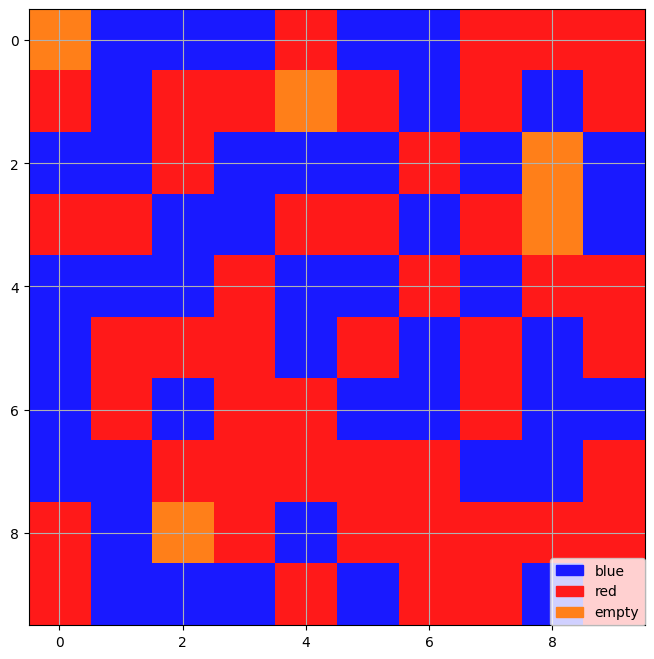

In [2]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import random
candidates = [0, 1, 2]
weights = [0.45, 0.45, 0.1]
data = []
count_0 = 0
count_1 = 0
count_2 = 0

ROWS, COLS = 10, 10

for _ in range(ROWS):
    for _ in range(COLS):
        row = random.choices(candidates, weights=weights, k=ROWS)
        count_0 += row.count(0)
        count_1 += row.count(1)
        count_2 += row.count(2)
    data.append(row)
print(data)
print(f"number of reds: {count_0}")
print(f"number of blue: {count_1}")
print(f"number of empty: {count_2}")
labels = {0: "blue", 1: "red", 2: "empty"}
cmap = {0: [0.1, 0.1, 1.0, 1], 1: [1.0, 0.1, 0.1, 1], 2: [1.0, 0.5, 0.1, 1]}
arrayShow = np.array([[cmap[i] for i in j] for j in data])
# create patches as legend
patches = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in cmap]

plt.figure(figsize=(8, 8))
plt.legend(labels)
plt.imshow(arrayShow)
plt.legend(handles=patches, loc=4, borderaxespad=0.)
plt.grid(True)
plt.show()

In [3]:
happy_array = np.random.choice(a=[False, True], size=(ROWS, COLS))
"""
#print(get_idx_adj(np.array(data), (0, 0), radius=1))
data_first_row = data[-1]
data_last_row = data[0]
data_first_col = [row[0] for row in data]
data_last_col = [row[-1] for row in data]
data_first_col.insert(0,data[-1][ -1] )
data_first_col.append(data[0][ -1])
data_last_col.insert(0, data[-1][ 0])
data_last_col.append(data[0][ 0])



data2 = data
print(data2)
data2.insert(0, data_first_row)
data2.append(data_last_row)
#print("shape data2 after inseeting new rows:", np.shape(data2))
print([len(a) for a in data2])
print("firts col ", len(data_first_col))
print("last col ", len(data_last_col))

for i in range(12):
    data2[i].insert(0, data_first_col[i])
    data2[i].extend([data_last_col[i]])
"""
def create_majority_matrix(data):
    
    data2 = np.full((ROWS+2, COLS+2), -1)

    # Copy the elements from the original matrix data
    data2[1:ROWS+1, 1:COLS+1] = data

    # Insert the new rows at the beginning and end of the matrix
    data2[0, 1:COLS+1] = data[-1]
    data2[ROWS+1, 1:COLS+1] = data[0]

    # Insert the new columns at the beginning and end of each row
    data2[:, 0] = data2[:, -2]
    data2[:, -1] = data2[:, 1]
    return data2

KeyboardInterrupt: 

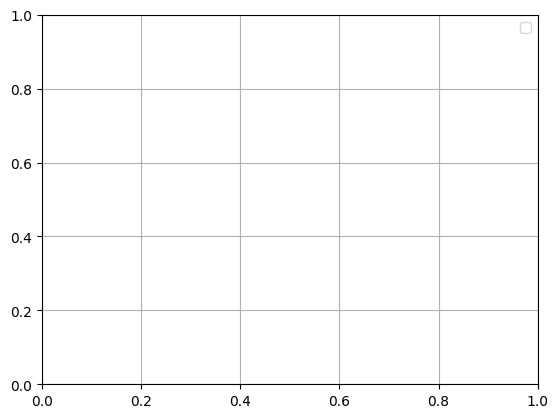

In [19]:
from IPython import display
%matplotlib inline
fig, ax = plt.subplots()
plt.ion()   
fig.canvas.draw()
plt.show(block=False)
data2 = create_majority_matrix(data)
while(True):

    for i, j in itertools.product(range(ROWS), range(COLS)):

        count_same_race = 0

        if (data2[i][j] == data2[i-1, j]):
            count_same_race += 1

        if (data2[i][j] == data2[i][j-1]):
            count_same_race += 1

        if (data2[i][j] == data2[i-1][j-1]):
            count_same_race += 1

        if (data2[i][j] == data2[i+1][j]):
            count_same_race += 1

        if (data2[i][j] == data2[i][j+1]):
            count_same_race += 1

        if (data2[i][j] == data2[i+1][j+1]):
            count_same_race += 1

        if (data2[i][j] == data2[i+1][j-1]):
            count_same_race += 1
        if (data2[i][j] == data2[i-1][j+1]):
            count_same_race += 1
            # check if the cell is happy

        happy_array[i][j] = count_same_race > 3
    #print("happiness computed...")
    for i in range(len(data)):
        for j in range(len(data)):
            if(data[i][j]!= 2 and happy_array[i][j] == False):
                direction_axis_0 = random.choice([1, -1])
                direction_axis_1 = random.choice([0,1, -1])
                pos_x, pos_y = (i+1+direction_axis_0 ), (j+1+direction_axis_1)
                while(data2[pos_x%len(data2)][pos_y%len(data2)]!=2):
                    direction_axis_0 = random.choice([1, -1])
                    direction_axis_1 = random.choice([0,1, -1])
                    pos_x += direction_axis_0
                    pos_y+= direction_axis_1
                tmp =data[i][j]
                data[i][j]=2
                data[pos_x%(len(data))][pos_y%len(data)]=tmp
                data2 = create_majority_matrix(data)
                
    labels = {0: "blue", 1: "red", 2: "empty"}
    cmap = {0: [0.1, 0.1, 1.0, 1], 1: [1.0, 0.1, 0.1, 1], 2: [1.0, 0.5, 0.1, 1]}
    arrayShow = np.array([[cmap[i] for i in j] for j in data])
    # create patches as legend
    patches = [mpatches.Patch(color=cmap[i], label=labels[i]) for i in cmap]

    #print("Plotting ...")
    plt.legend(labels)
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.legend(handles=patches, loc=4, borderaxespad=0.)
    plt.grid(True)
    ax.imshow(arrayShow)
    #plt.gcf().canvas.draw()
    #fig.canvas.draw()
    
    